In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# Импортирую необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score,f1_score,log_loss,\
classification_report, roc_curve
import statsmodels.api as sm
import seaborn as sns

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn
from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.preprocessing import FunctionTransformer
import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import statsmodels.api as sm



# Загружаю данные

In [ ]:
df = pd.read_csv('UCI_Credit_Card.csv')

Набор данных содержит следующие признаки:
1. ID: ID каждого клиента
2. LIMIT_BAL: сумма предоставленного кредита в тайваньских долларах
(включает индивидуальный и семейный / дополнительный кредит)
3. SEX: Пол (1 = мужской, 2 = женский)
4. EDUCATION: (1 = аспирантура, 2 = университет, 3 = средняя школа,
4 = другие, 5 = неизвестно, 6 = неизвестно)
5. MARRIAGE: Семейное положение (1 = женат, 2 = холост, 3 = другие)
6. AGE: Возраст в годах
17
7. PAY_0: Статус погашения в сентябре 2005 г. (-1 = надлежащая оплата,
1 = задержка платежа на один месяц, 2 = задержка платежа на два
месяца,. . . 8 = задержка платежа на восемь месяцев, 9 = задержка
платежа на девять месяцев и более)
8. PAY_2: Статус погашения в августе 2005 г. (шкала такая же, как указано выше)
9. PAY_3: Статус погашения в июле 2005 г. (шкала такая же, как указано
выше)
10. PAY_4: Статус погашения в июне 2005 г. (шкала такая же, как указано
выше)
11. PAY_5: Статус погашения в мае 2005 г. (шкала такая же, как указано
выше)
12. PAY_6: Статус погашения в апреле 2005 г. (шкала такая же, как указано
выше)
13. BILL_AMT1: Сумма выписки по счету за сентябрь 2005 г. (NT-доллар)
14. BILL_AMT2: Сумма выписки по счету в августе 2005 г. (NT-доллар)
15. BILL_AMT3: Сумма выписки по счету в июле 2005 г. (NT-доллар)
16. BILL_AMT4: Сумма выписки по счету в июне 2005 г. (NT-доллар)
17. BILL_AMT5: Сумма выписки по счету в мае 2005 г. (NT-доллар)
18. BILL_AMT6: Сумма выписки по счету за апрель 2005 г. (NT-доллар)
19. PAY_AMT1: Сумма предыдущего платежа в сентябре 2005 г. (NT-доллар)
20. PAY_AMT2: Сумма предыдущего платежа в августе 2005 г. (NT-доллар)
21. PAY_AMT3: Сумма предыдущего платежа в июле 2005 г. (NT-доллар)
22. PAY_AMT4: Сумма предыдущего платежа в июне 2005 г. (NT-доллар)
23. PAY_AMT5: Сумма предыдущего платежа в мае 2005 г. (NT-доллар)
24. PAY_AMT6: Сумма предыдущего платежа в апреле 2005 г. (NT-доллар)
25. default.payment.next.month: Дефолт (1 = да, 0 = нет)

Данные взяты отсюда - https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/data

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Посмотрим информацию о данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

# EDA

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


проверка пропущенных значений в данных

In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Они отсутствуют

Проверим на дубликаты

In [ ]:
np.sum(df.duplicated())

0

Также отсутствуют

Построим графики распределения

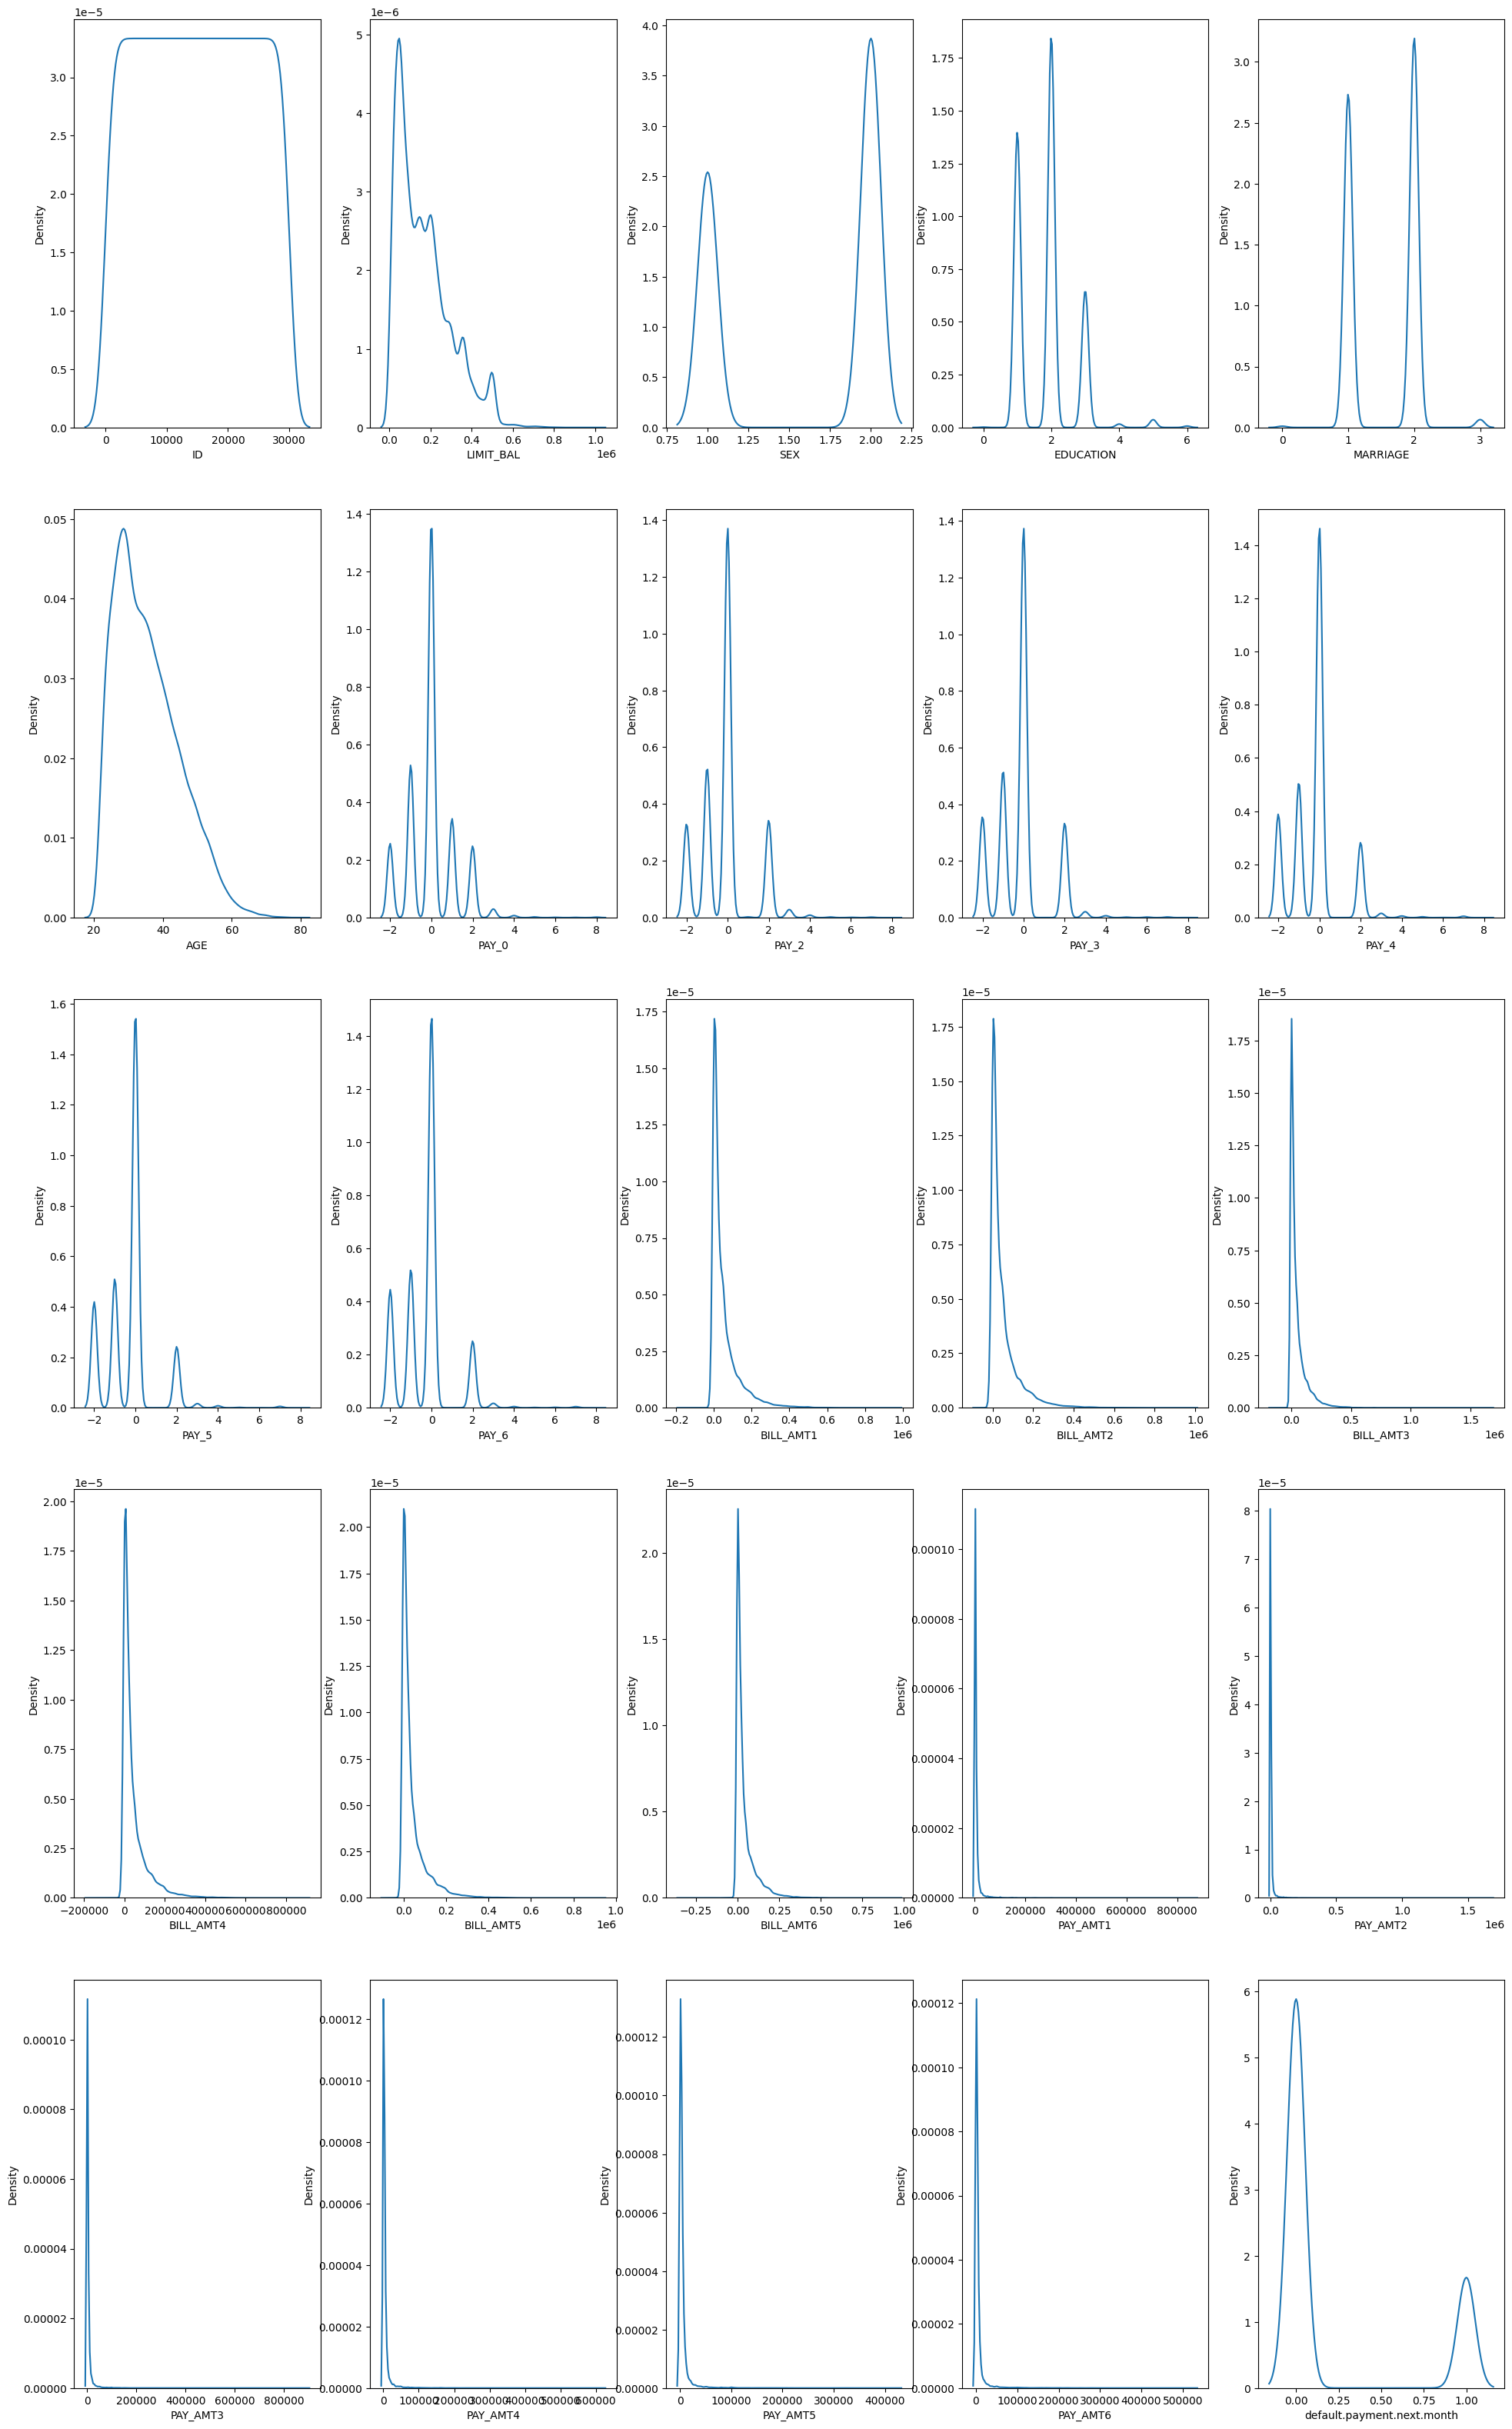

In [ ]:
width = 5
height = int(np.ceil(25/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(24,40))

for i, col in enumerate(df.columns):
    plt.subplot(height,width, i+1)
    sns.kdeplot(data=df, common_norm=False,
                x=col);

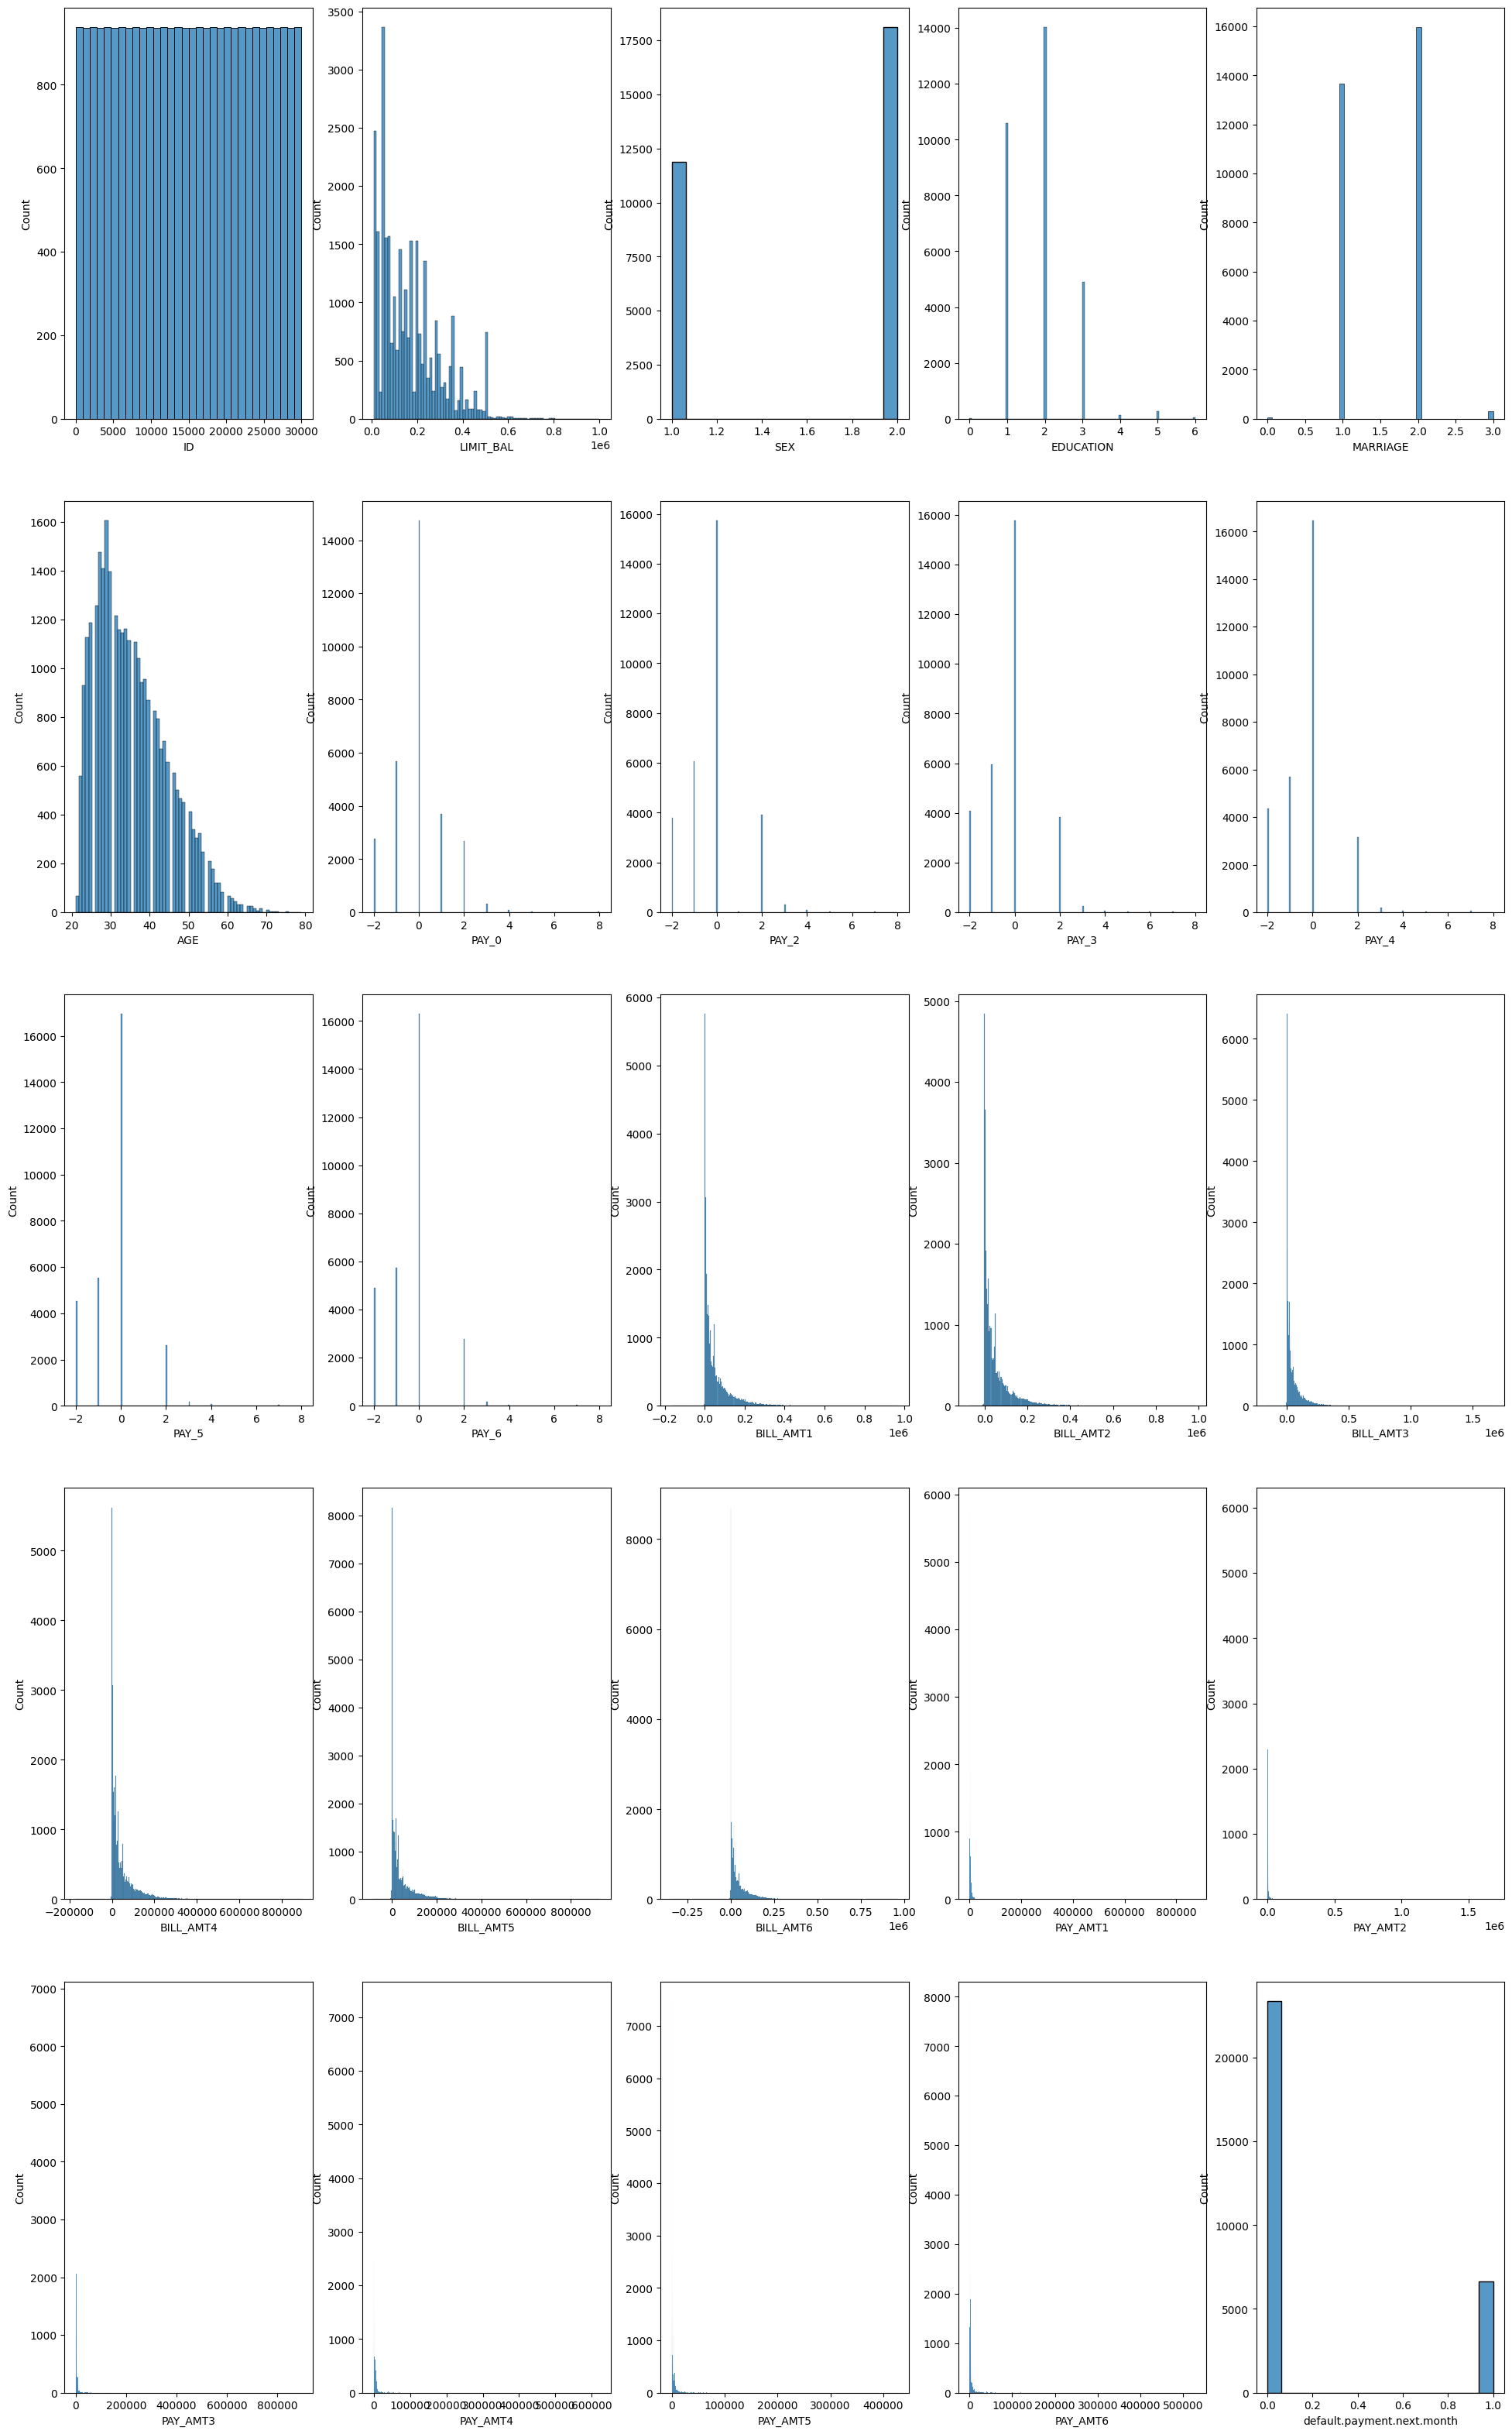

In [ ]:
width = 5
height = int(np.ceil(25/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(24,40))

for i, col in enumerate(df.columns):
    plt.subplot(height,width, i+1)
    sns.histplot(data=df, common_norm=False,
                x=col);

In [ ]:
df.rename(columns={"default.payment.next.month": "def_pay",
                    'PAY_0': 'PAY_1'}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


У некоторых признаков есть некоторые непонятные значения

Так 0 в MARRIAGE можно отнести к категории «Другое».

0, 5 и 6 в EDUCATION также можно отнести в категорию «Другое».

Переменные «PAY_n» показывают, на сколько месяцев задерживается платеж. Значение «-1» означает, что платеж был произведен вовремя. Однако значение «-2» и «0» неясно. Чтобы было понятнее, было бы неплохо считать своевременную оплату равной 0.

In [ ]:
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: 4 if x in [0, 5, 6] else x)

In [ ]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

In [ ]:
def replace_to_zero(col):
    fil = (df[col] == -2) | (df[col] == -1) | (df[col] == 0)
    df.loc[fil, col] = 0

for i in ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    replace_to_zero(i)

Посмотрим на матрицу корреляций

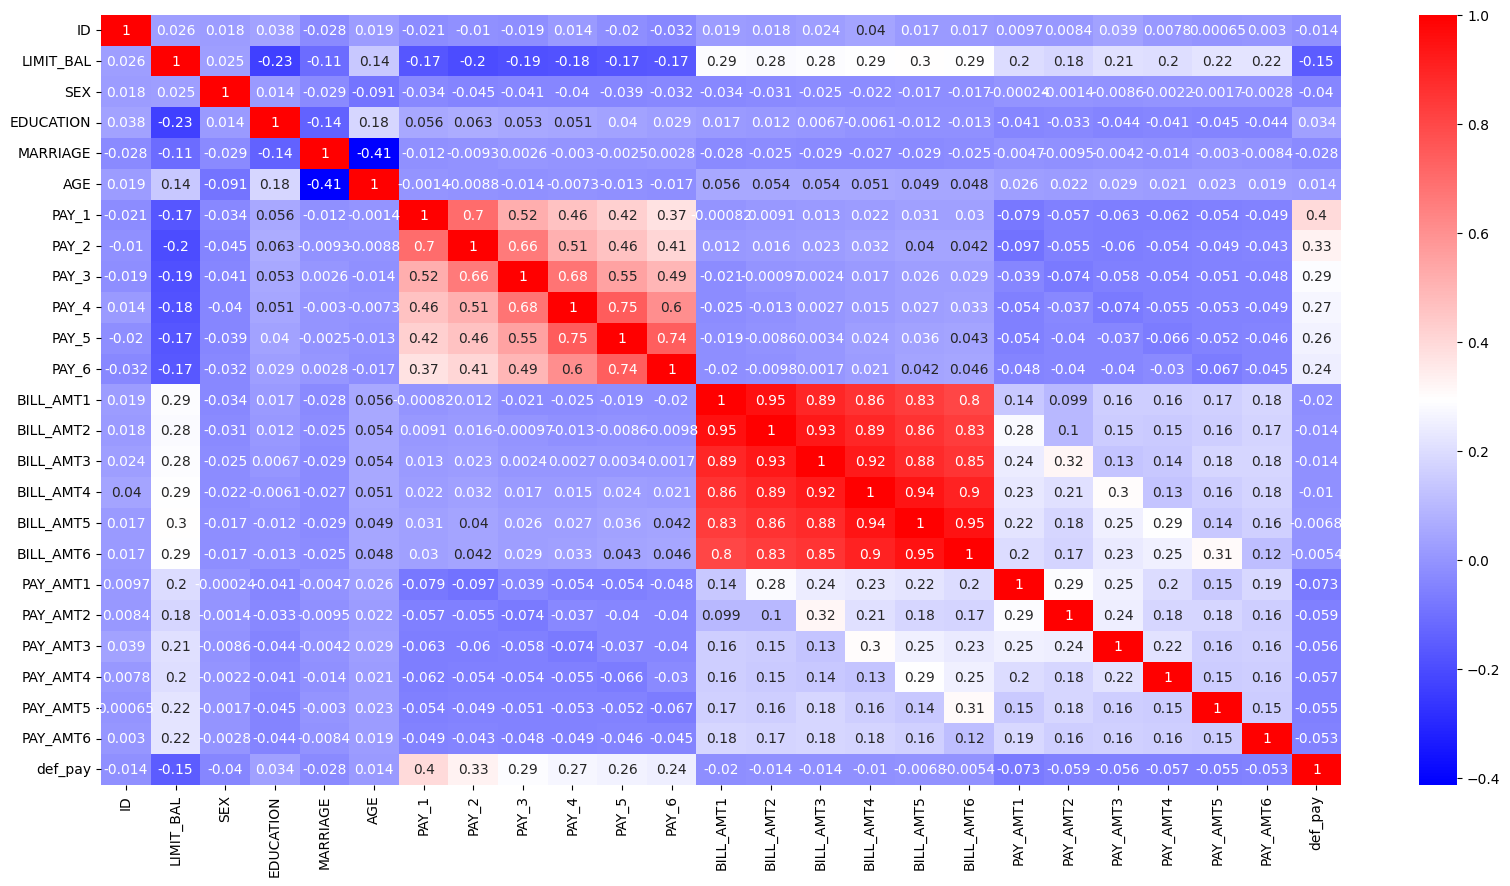

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="bwr");

Удалим сильно коррелирующие переменные

In [ ]:
df.drop(columns=['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'ID'], inplace = True)

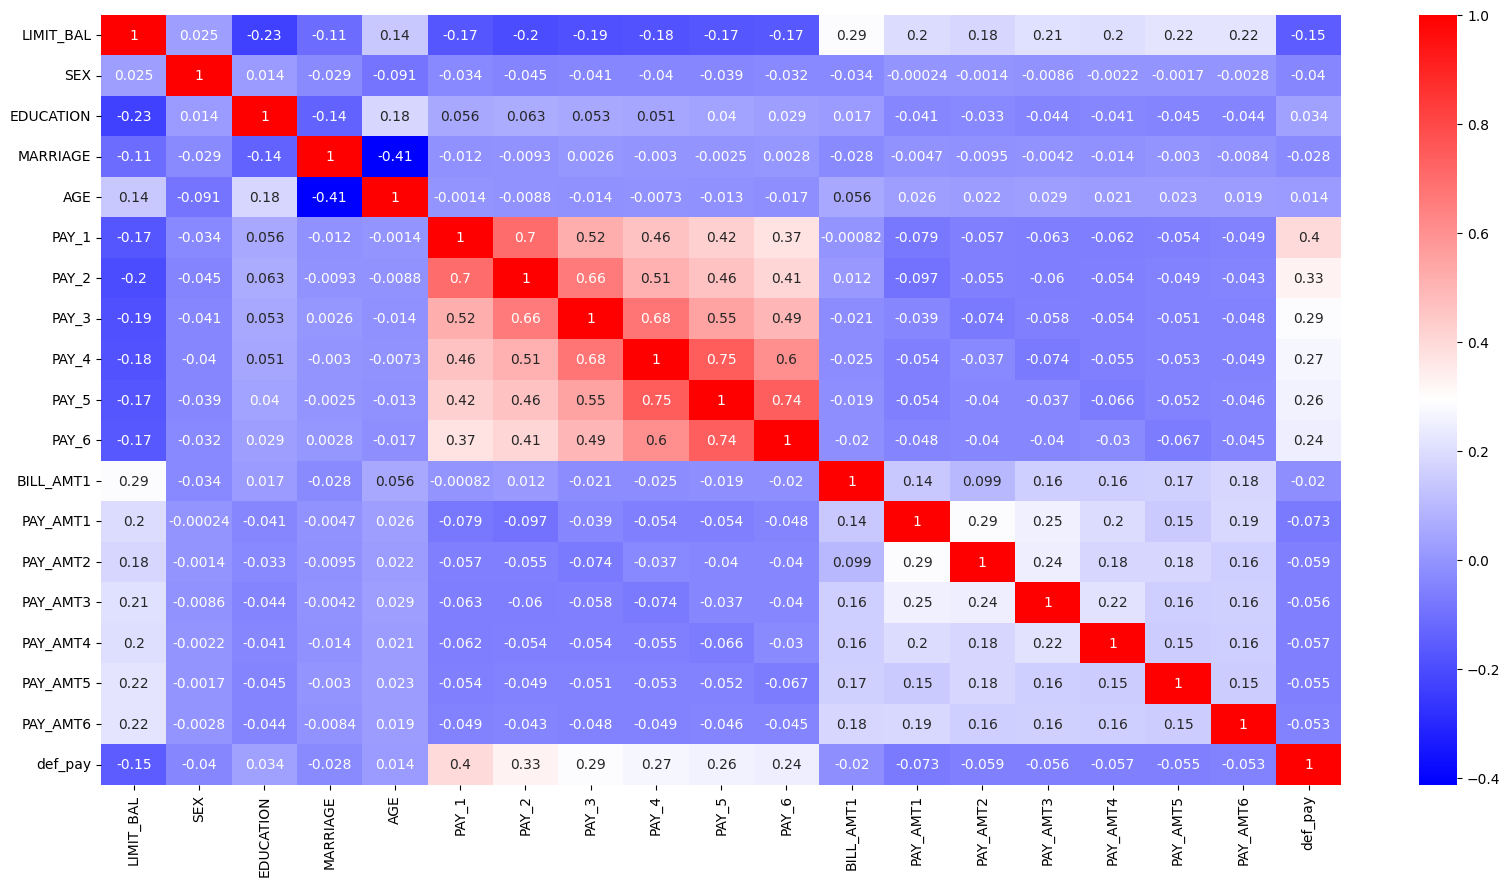

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="bwr");

# Логистическая регрессия

In [ ]:
# @title Вспомагательные функции { display-mode: "form" }

def get_coefs (model):
    """Берем веса как атрибуты обученной модели.
    Входные переменные:
    ===========
    model: обученная модель
    """
    B0=model.intercept_[0]
    B=model.coef_
    return B0, B

def print_model (B0,B,features_names):
    """Написание уравнения модели.
    Входные переменные:
    ===========
    B0: смещение (независимый коэффициент)
    weights: веса признаков
    features_names: список названий признаков
    """
    line='{:.3f}'.format(B0)
    sign=['+','-']
    for p,(fn,b) in enumerate(zip(features_names,B)):
        line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

    print('Решение')
    print(line)

def vis_weigths(weights,features_names = None, width = 1200, height = 600):
    """Отрисовка весов.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    """
    numbers = np.arange(0,len(weights))                 # создаем массив от 0 до количество весов-1
    if features_names:
        tick_labels = np.hstack(['B0',features_names])
    else:
        tick_labels = ['B'+str(num) for num in numbers] # создаем "названия" весов

    ind = np.argsort(np.abs(weights))
    weights = weights[ind][::-1]

    fig = go.Figure()
    fig.add_trace(go.Bar(x=numbers[weights<0], y=weights[weights<0],
                    marker_color='red',
                    name='отрицательные веса'))
    fig.add_trace(go.Bar(x=numbers[weights>=0], y=weights[weights>=0],
                    marker_color='blue',
                    name='положительные веса'
                    ))

    fig.update_layout(
                title="Веса модели",
                width=width,
                height=height,
                template = "plotly_dark",
                xaxis = dict(
                                         tickmode = 'array',
                                         tickvals = numbers,
                                         ticktext = tick_labels[ind][::-1],
                                         )
                )

    fig.show()

def vis_weigths_threshold(weights, feature_names, threshold, width = 1200, height = 600):
    """Отрисовка весов с фильтром.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    threshold: порог "значимости" коэффициентов
    """
    # фильтруем веса коэффициентов
    mask = np.abs(weights) >= threshold
    weights_filtered = weights[mask]
    feature_names_filtered = [name for name, m in zip(feature_names, mask[1:]) if m]

    # Рисуем столбчатую диаграмму
    vis_weigths(weights_filtered,feature_names_filtered, width = width, height = height)


def cross_validation (X, y, model, scoring, cv_rule):
    """Расчет метрик на кросс-валидации.
    Параметры:
    ===========
    model: модель или pipeline
    X: признаки
    y: истинные значения
    scoring: словарь метрик
    cv_rule: правило кросс-валидации
    """
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])


def analyse_linear_model(model, X_train, y_train, X_val, y_val, metrics, metric_names, scoring_reg, cv_rule):
    B0, B = get_coefs(model)
    features_names = list(columns_num)
    print_model(B0,B,features_names)

    Bs = np.hstack([B0,B])
    vis_weigths(Bs,features_names)

    analyse_model(model, X_train, y_train, X_val, y_val, metrics, metric_names, scoring_reg, cv_rule)


def analyse_model(model, X_train, y_train, X_val, y_val, metrics, metric_names, scoring_reg, cv_rule):

    for name, metric,  in zip(metric_names, metrics):
        print(name+ f" на тренировочной выборке: {calculate_metric(model, X_train, y_train, metric):.4f}")
        print(name+ f" на валидационной выборке: {calculate_metric(model, X_val, y_val, metric):.4f}")

    cross_validation (X_train, y_train,
                    model,
                    scoring_reg,
                    cv_rule)

Разбиваю данные на обучающую и тестовую выборки

In [ ]:
X = df.drop(columns=['def_pay'])
y = df['def_pay']


X_train , X_val, Y_train , Y_val = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
# @title Поиск лучших гиперпараметров { display-mode: "form" }

numerical = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1',
             'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

#Пайплайн ¯\_(ツ)_/¯
t = [('num', StandardScaler(), numerical)]
col_transform = ColumnTransformer(transformers=t, remainder='passthrough')

logreg = LogisticRegression(class_weight='balanced', random_state=42)

pipeline = Pipeline(steps=[('prep', col_transform), ('logreg', logreg)])

#Подбираю параметры
parameters_grid = {
    'logreg__penalty': ['l1', 'l2', 'elasticnet'],
    'logreg__C': np.linspace(1, 1000, num=5),
    'logreg__solver': ['sag', 'saga', 'lbfgs'],
    'logreg__l1_ratio': [0.25, 0.5, 0.75],
    'logreg__max_iter': np.arange(100, 500, 100)
     }

cv = StratifiedKFold(n_splits=5, shuffle=True)
grid_cv = GridSearchCV(pipeline, parameters_grid,
                       scoring='roc_auc', cv=cv, verbose=2)

grid_cv.fit(X_train, Y_train)
print(grid_cv.best_params_)


In [ ]:
print(grid_cv.best_params_)


{'logreg__C': 500.5, 'logreg__l1_ratio': 0.25, 'logreg__max_iter': 200, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}


In [ ]:
numerical = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1',
             'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

best_param = {'C': 500.5,
              'l1_ratio': 0.25,
              'max_iter': 200,
              'penalty': 'l2',
              'solver': 'lbfgs'}

#Пайплайн ¯\_(ツ)_/¯
t = [('num', StandardScaler(), numerical)]
col_transform = ColumnTransformer(transformers=t, remainder='passthrough')

logreg = LogisticRegression(**best_param, class_weight='balanced', random_state=42)

pipeline = Pipeline(steps=[('prep', col_transform), ('model', logreg)])

pipeline.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'PAY_AMT1',
                                                   'PAY_AMT2', 'PAY_AMT3',
                                                   'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6'])])),
                ('model',
                 LogisticRegression(C=500.5, class_weight='balanced',
                                    l1_ratio=0.25, max_iter=200,
                                    random_state=42))])

## Метрики модели

In [ ]:
pipe_pred = pipeline.predict(X_val)
print(classification_report(Y_val, pipe_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      7040
           1       0.49      0.56      0.52      1960

    accuracy                           0.78      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.79      0.78      0.78      9000



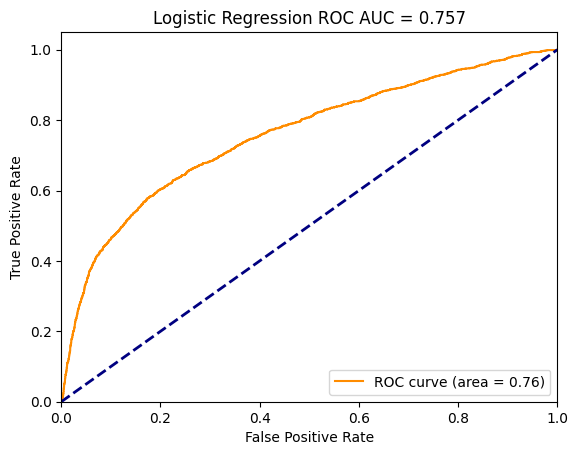

In [ ]:
p2=pipeline.predict_proba(X_val)

fpr, tpr, thresholds = roc_curve(Y_val, p2[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()


Несмотря на попытки сделать метрики лучше, дефолтные заемщики все же прогнозируются плохо

## Веса модели

In [ ]:
pipeline.named_steps.model
B0, B = get_coefs(pipeline.named_steps.model)
features_names = pipeline[:-1].get_feature_names_out()

BS = np.insert(B, 0, B0)
vis_weigths_threshold(BS,features_names, 0.05, width = 1400)

Наилучшие предикторы PAY_1, LIMIT_BAL и PAY_AMT2

## Shap

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

In [ ]:
data_transform = pipeline['prep'].transform(X_val)

In [ ]:
%time
# Задаем метод predict от объекта класса модели машинного обучения. любой
explainer_line = shap.Explainer(pipeline.named_steps.model.predict, # модель (не pipeline)
                           data_transform, # данные (которые подставляются в итоговую модель)
                           feature_names=pipeline['prep'].get_feature_names_out() # название признаков
                           )
shap_values_line = explainer_line(data_transform)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


PermutationExplainer explainer: 9001it [02:38, 53.82it/s]


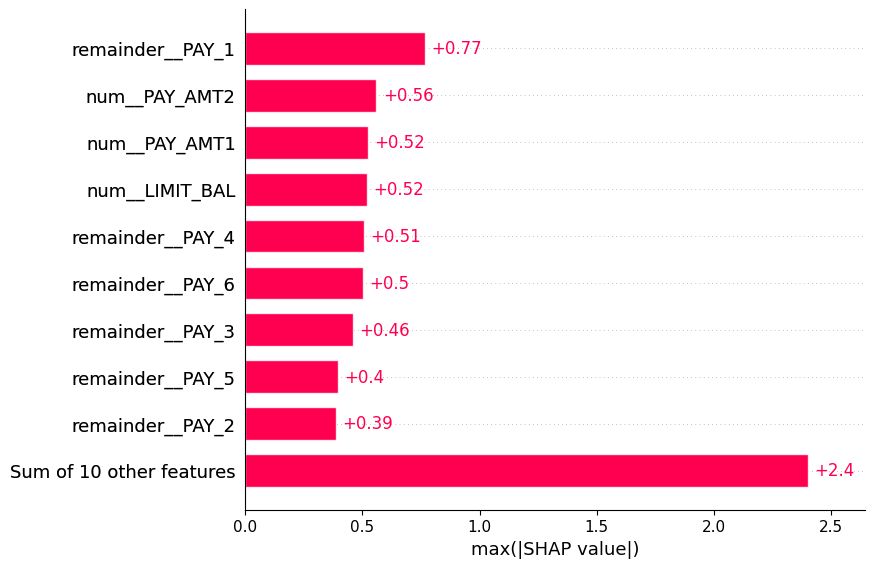

In [ ]:
shap.plots.bar(shap_values_line.abs.max(0))

Уровень значимости параметров поменялся, но PAY_1 также остаётся самым значимым

## Посмотрим p-статистики

In [ ]:
logit_model = sm.Logit(Y_train.set_axis(list(range(0, 21000))), pd.DataFrame(pipeline.named_steps.prep.transform(X_train), columns=pipeline[:-1].get_feature_names_out())).fit()
print (logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.448273
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                def_pay   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20982
Method:                           MLE   Df Model:                           17
Date:                Sat, 02 Mar 2024   Pseudo R-squ.:                  0.1546
Time:                        15:17:53   Log-Likelihood:                -9413.7
converged:                       True   LL-Null:                       -11136.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
num__LIMIT_BAL          -0.2608      0.024    -11.035      0.000      -0.307      -0.214

Удалим статистически незначимые параметры

In [ ]:
df_subset = df.drop(columns=['AGE', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_2', 'PAY_5']).copy()

X = df_subset.drop(columns=['def_pay'])
y = df_subset['def_pay']


X_train , X_val, Y_train , Y_val = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
# @title Поиск лучших гиперпараметров { display-mode: "form" }

numerical = ['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1',
             'PAY_AMT2', 'PAY_AMT6']

#Пайплайн ¯\_(ツ)_/¯
t = [('num', StandardScaler(), numerical)]
col_transform = ColumnTransformer(transformers=t, remainder='passthrough')

logreg = LogisticRegression(class_weight='balanced', random_state=42)

pipeline = Pipeline(steps=[('prep', col_transform), ('logreg', logreg)])

#Подбираю параметры
parameters_grid = {
    'logreg__penalty': ['l1', 'l2', 'elasticnet'],
    'logreg__C': np.linspace(1, 1000, num=5),
    'logreg__solver': ['sag', 'saga', 'lbfgs'],
    'logreg__l1_ratio': [0.25, 0.5, 0.75],
    'logreg__max_iter': np.arange(100, 500, 100)
     }

cv = StratifiedKFold(n_splits=5, shuffle=True)
grid_cv = GridSearchCV(pipeline, parameters_grid,
                       scoring='roc_auc', cv=cv, verbose=2)

grid_cv.fit(X_train, Y_train)

In [ ]:
print(grid_cv.best_params_)

{'logreg__C': 1.0, 'logreg__l1_ratio': 0.25, 'logreg__max_iter': 100, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}


In [ ]:
numerical = ['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1',
             'PAY_AMT2', 'PAY_AMT6']

best_param = {'C': 1.0,
              'l1_ratio': 0.25,
              'max_iter': 100,
              'penalty': 'l2',
              'solver': 'saga'}

#Пайплайн ¯\_(ツ)_/¯
t = [('num', StandardScaler(), numerical)]
col_transform = ColumnTransformer(transformers=t, remainder='passthrough')

logreg = LogisticRegression(**best_param, class_weight='balanced', random_state=42)

pipeline = Pipeline(steps=[('prep', col_transform), ('model', logreg)])

pipeline.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['LIMIT_BAL', 'BILL_AMT1',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT6'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', l1_ratio=0.25,
                                    random_state=42, solver='saga'))])

In [ ]:
pipe_pred = pipeline.predict(X_val)
print(classification_report(Y_val, pipe_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7040
           1       0.48      0.57      0.52      1960

    accuracy                           0.77      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.79      0.77      0.78      9000



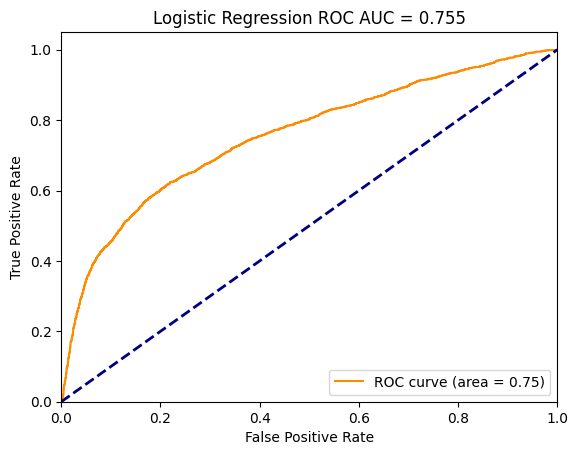

In [ ]:
p2=pipeline.predict_proba(X_val)

fpr, tpr, thresholds = roc_curve(Y_val, p2[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

Почти ничего не изменилось

# XGBoost

In [ ]:
# @title Поиск лучших гиперпараметров { display-mode: "form" }

numerical = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1',
             'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

#Пайплайн ¯\_(ツ)_/¯
t = [('num', StandardScaler(), numerical)]
col_transform = ColumnTransformer(transformers=t, remainder='passthrough')

xgboost_clf = XGBClassifier(random_state=42,
                            max_leaves=0,
                            n_jobs=-1)

pipeline = Pipeline(steps=[('prep', col_transform), ('xgboost', xgboost_clf)])

#Подбираю параметры
params = {
          'xgboost__n_estimators': np.logspace(1, 3, num=5, endpoint=True, base=10.0, dtype=int).tolist(),
          'xgboost__max_depth': [2, 3, 4, 5],
          'xgboost__learning_rate': np.logspace(-1, 0, num=5, endpoint=True, base=10.0).tolist(),
          'xgboost__reg_alpha': np.logspace(-4, 0, num=5, endpoint=True, base=10.0).tolist(),
          'xgboost__reg_lambda': np.logspace(-4, 0, num=5, endpoint=True, base=10.0).tolist()
         }

search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=params,
    factor=2,
    resource='n_samples',
    max_resources='auto',
    min_resources=1875,
    aggressive_elimination=True,
    cv=5,
    refit=True,
    return_train_score=False,
    random_state=42,
    n_jobs=1,
    verbose=1
)

search.fit(X_train, Y_train)
print(search.best_params_)


In [ ]:
numerical = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1',
             'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

best_param = {'learning_rate': 0.1,
              'max_depth': 3,
              'n_estimators': 31,
              'reg_alpha': 0.001,
              'reg_lambda': 0.0001}

#Пайплайн ¯\_(ツ)_/¯
t = [('num', StandardScaler(), numerical)]
col_transform = ColumnTransformer(transformers=t, remainder='passthrough')

xgboost_clf = XGBClassifier(**best_param, random_state=42,
                            max_leaves=0,
                            n_jobs=-1)

pipeline = Pipeline(steps=[('prep', col_transform), ('xgboost', xgboost_clf)])

pipeline.fit(X_train, Y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'PAY_AMT1',
                                                   'PAY_AMT2', 'PAY_AMT3',
                                                   'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6'])])),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=N...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=0, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=31, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

## Метрики

In [ ]:
pipe_pred = pipeline.predict(X_val)
print(classification_report(Y_val, pipe_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



Precision для дефолтных повысился по сравнению с логистической регрессией, остальные просели

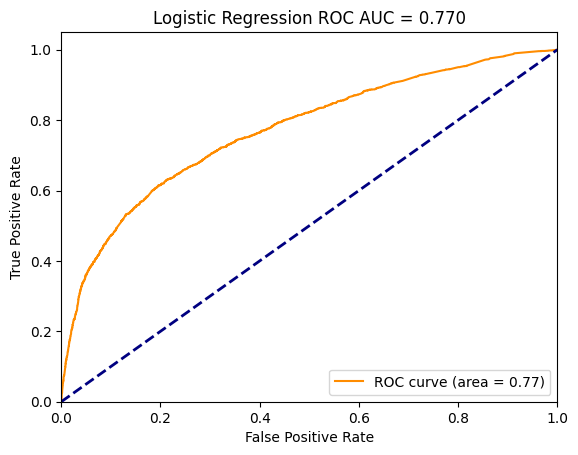

In [ ]:
p2=pipeline.predict_proba(X_val)

fpr, tpr, thresholds = roc_curve(Y_val, p2[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()


ROC AUC тоже повысился

## Feature importance

<BarContainer object of 19 artists>

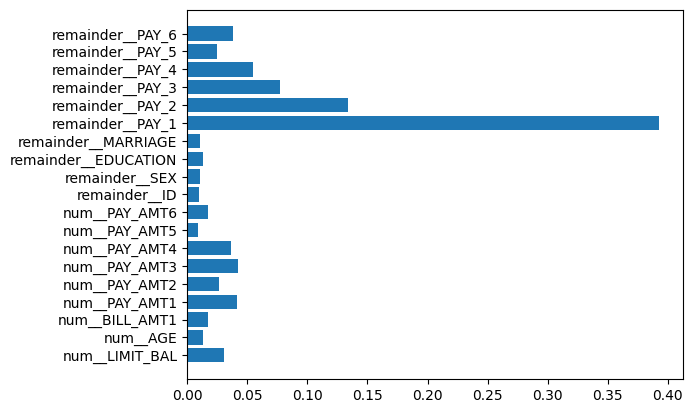

In [ ]:
plt.barh(pipeline['prep'].get_feature_names_out(), pipeline.named_steps.xgboost.feature_importances_)

In [ ]:
data_transform = pipeline['prep'].transform(X_val)

In [ ]:
%time
# Задаем метод predict от объекта класса модели машинного обучения. любой
explainer_line = shap.Explainer(pipeline.named_steps.xgboost.predict, # модель (не pipeline)
                           data_transform, # данные (которые подставляются в итоговую модель)
                           feature_names=pipeline['prep'].get_feature_names_out() # название признаков
                           )
shap_values_line = explainer_line(data_transform)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


PermutationExplainer explainer: 9001it [05:07, 28.65it/s]                          


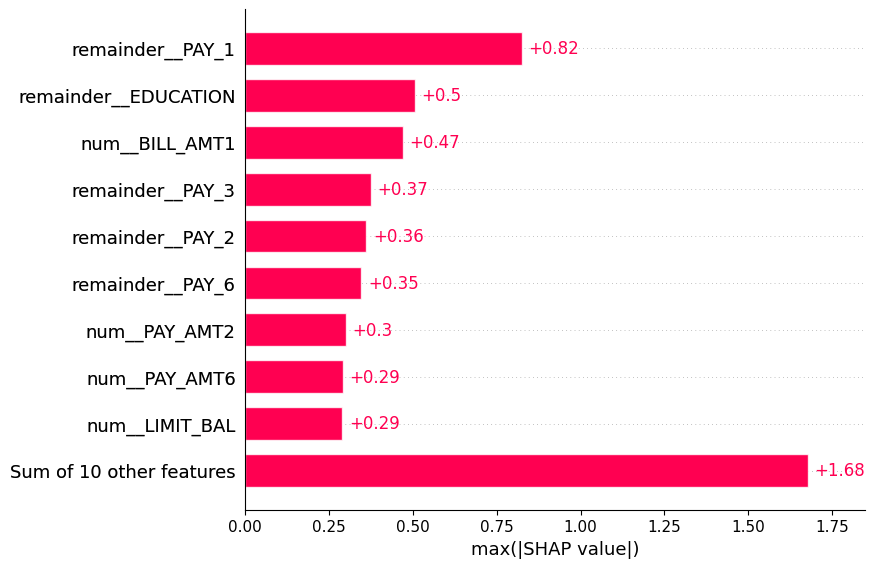

In [ ]:
shap.plots.bar(shap_values_line.abs.max(0))

Из интересного при бустинге shap выделил EDUCATION и BILLL_AMT1 как наиболее значимые прищнаки. PAY_1 все также остается лидером